# 07. Seaborn 기초 - 실습 문제

## 실습 안내
- 총 8개 문제 (총 100점)
- Seaborn 통계 차트 연습
- 박스플롯, 바이올린 플롯, 히트맵, 카운트 플롯 등

## 환경 설정 및 데이터 로드

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from koreanize_matplotlib import koreanize
koreanize()

# Seaborn 스타일 설정
sns.set_style('whitegrid')
sns.set_palette('Set2')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
production_df = pd.read_csv('../data/05_production.csv', encoding='utf-8-sig')
sensor_df = pd.read_csv('../data/08_sensor_data.csv', encoding='utf-8-sig')

# 날짜 변환
production_df['production_date'] = pd.to_datetime(production_df['production_date'])
sensor_df['measurement_time'] = pd.to_datetime(sensor_df['measurement_time'])

# 불량률 계산
production_df['defect_rate'] = (
    production_df['defect_quantity'] / production_df['actual_quantity'] * 100
).round(2)

print("데이터 로드 완료!")

데이터 로드 완료!


---
## 문제 1: 교대조별 불량률 박스플롯 (10점)

**요구사항**:
1. 교대조별 불량률 박스플롯 생성
2. 색상 팔레트: 'Set2'
3. 선 굵기: 2
4. 제목: '교대조별 불량률 분포'
5. Figure 크기: (10, 6)



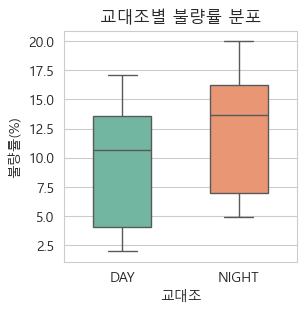

In [75]:
# 5. Figure 크기: (10, 6)
# plt.figure(figsize=(10, 6))
plt.figure(figsize=(3, 3))

# 1. 교대조별 불량률 박스플롯 생성
# 2. 색상 팔레트: 'Set2'
# 3. 선 굵기: 2
sns.boxplot(data=production_df, x='shift', y='defect_rate', hue='shift',
            palette='Set2', linewidth=1, width=0.5)

# 4. 제목: '교대조별 불량률 분포'
plt.title('교대조별 불량률 분포')
plt.xlabel('교대조')
plt.ylabel('불량률(%)')

plt.show()

---
## 문제 2: 제품-교대조별 생산량 바이올린 플롯 (15점)

**요구사항**:
1. 제품별로 교대조 생산량을 바이올린 플롯으로 비교
2. 색상 팔레트: 'Set2'
3. 제목: '제품-교대조별 생산량 분포'
4. 범례 추가
5. Figure 크기: (12, 6)



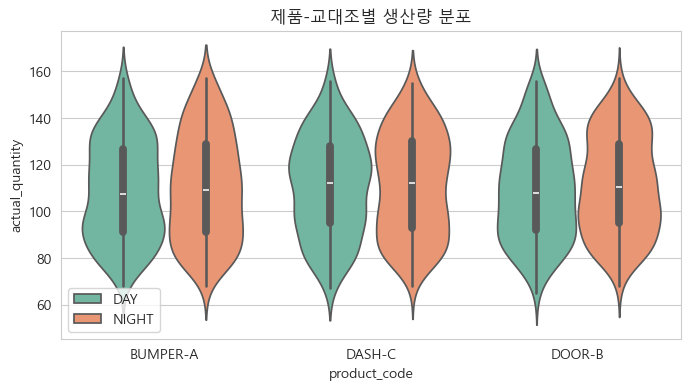

In [76]:
# 5. Figure 크기: (12, 6)
# plt.figure(figsize=(12, 6))
plt.figure(figsize=(8, 4))

# 1. 제품별로 교대조 생산량을 바이올린 플롯으로 비교
# 2. 색상 팔레트: 'Set2'
sns.violinplot(data=production_df, x='product_code', y='actual_quantity', hue='shift', palette='Set2')

# 3. 제목: '제품-교대조별 생산량 분포'
plt.title('제품-교대조별 생산량 분포')
# 4. 범례 추가
plt.legend()

plt.show()

---
## 문제 3: 센서 데이터 상관관계 히트맵 (15점)

**요구사항**:
1. 센서 데이터의 상관관계 계산 (temperature, pressure, vibration, current)
2. 히트맵 생성:
   - annot=True, fmt='.3f'
   - cmap='coolwarm'
   - center=0
   - square=True
   - linewidths=1
3. 제목: '센서 데이터 상관관계 매트릭스'
4. Figure 크기: (8, 6)



In [77]:
# 1. 센서 데이터의 상관관계 계산 (temperature, pressure, vibration, current)
sensor_corr = sensor_df.loc[:, 'temperature':'current'].corr()
sensor_corr

,temperature,pressure,vibration,current
temperature,1.000000,0.450458,0.104163,-0.099645
pressure,0.450458,1.000000,0.837068,0.840483
vibration,0.104163,0.837068,1.000000,0.872423
current,-0.099645,0.840483,0.872423,1.000000


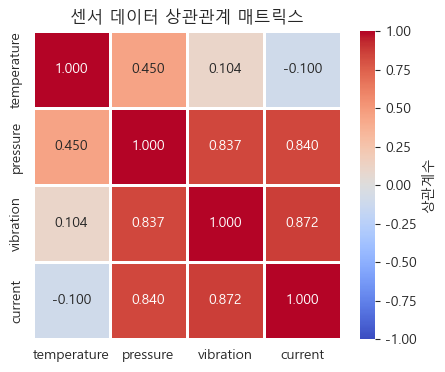

In [78]:
# 4. Figure 크기: (8, 6)
plt.figure(figsize=(5, 4))
# 2. 히트맵 생성:
#    - annot=True, fmt='.3f'
#    - cmap='coolwarm'
#    - center=0
#    - square=True
#    - linewidths=1
sns.heatmap(data=sensor_corr, annot=True, fmt='.3f', vmin=-1, vmax=1,
            cmap='coolwarm', center=0, square=True, linewidths=1, cbar_kws={'label':'상관계수'})

# 3. 제목: '센서 데이터 상관관계 매트릭스'
plt.title('센서 데이터 상관관계 매트릭스')

plt.show()

---
## 문제 4: 제품-교대조 평균 사이클 타임 히트맵 (15점)

**요구사항**:
1. 제품-교대조별 평균 사이클 타임 피벗 테이블 생성
2. 히트맵 생성:
   - annot=True, fmt='.1f'
   - cmap='YlGnBu'
   - linewidths=1
   - cbar_kws={"label": "평균 사이클 타임 (초)"}
3. 제목: '제품-교대조별 평균 사이클 타임'
4. Figure 크기: (8, 6)



In [79]:
# 1. 제품-교대조별 평균 사이클 타임 피벗 테이블 생성
cycle_pivot = pd.pivot_table(data=production_df, index='shift', columns='product_code', values='cycle_time', aggfunc='mean')
cycle_pivot

product_code,BUMPER-A,DASH-C,DOOR-B
shift,,,
DAY,76.654325,87.108110,67.063229
NIGHT,76.557143,86.679315,67.606180


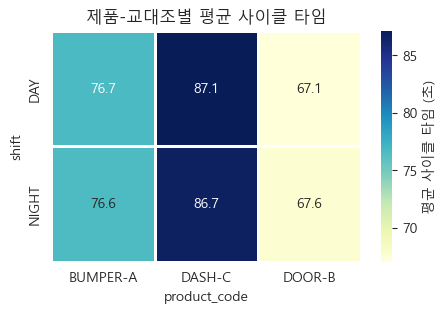

In [80]:
# 4. Figure 크기: (8, 6)
plt.figure(figsize=(5, 3))
# plt.figure(figsize=(5, 4))

# 2. 히트맵 생성:
#    - annot=True, fmt='.1f'
#    - cmap='YlGnBu'
#    - linewidths=1
#    - cbar_kws={"label": "평균 사이클 타임 (초)"}
sns.heatmap(data=cycle_pivot, annot=True, fmt='.1f',
            cmap='YlGnBu', linewidths=1, cbar_kws={"label": "평균 사이클 타임 (초)"})

# 3. 제목: '제품-교대조별 평균 사이클 타임'
plt.title('제품-교대조별 평균 사이클 타임')

plt.show()

---
## 문제 5: 제품별 생산 건수 카운트 플롯 (10점)

**요구사항**:
1. 제품별 생산 건수 카운트 플롯
2. 교대조별로 색상 구분 (hue='shift')
3. 색상 팔레트: 'Set2'
4. 제목: '제품-교대조별 생산 건수'
5. 범례 추가
6. Figure 크기: (10, 6)



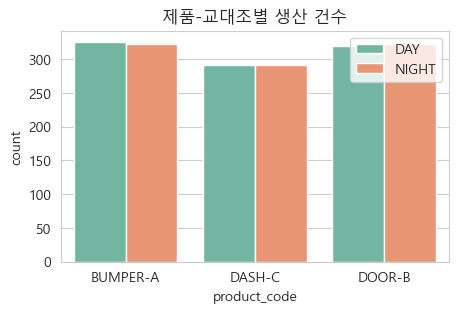

In [81]:
# 6. Figure 크기: (10, 6)
# plt.figure(figsize=(10, 6))
plt.figure(figsize=(5, 3))

# 1. 제품별 생산 건수 카운트 플롯
# 2. 교대조별로 색상 구분 (hue='shift')
# 3. 색상 팔레트: 'Set2'
sns.countplot(data=production_df, x='product_code', hue='shift', palette='Set2')

# 4. 제목: '제품-교대조별 생산 건수'
plt.title('제품-교대조별 생산 건수')
# 5. 범례 추가
plt.legend()

plt.show()

---
## 문제 6: 제품별 평균 불량률 바 플롯 (10점)

**요구사항**:
1. 제품별 평균 불량률 바 플롯
2. 오차 막대: 표준편차 (ci='sd')
3. 색상 팔레트: 'Set2'
4. 제목: '제품별 평균 불량률 (±표준편차)'
5. Figure 크기: (10, 6)



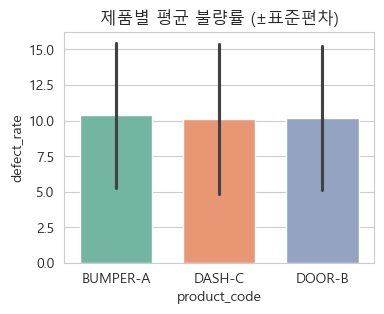

In [82]:
# 5. Figure 크기: (10, 6)
# plt.figure(figsize=(10, 6))
plt.figure(figsize=(4, 3))

# 1. 제품별 평균 불량률 바 플롯
# 2. 오차 막대: 표준편차 (ci='sd')
# 3. 색상 팔레트: 'Set2'
sns.barplot(data=production_df, x='product_code', y='defect_rate', hue='product_code',
            errorbar='sd', palette='Set2', width=0.7)

# 4. 제목: '제품별 평균 불량률 (±표준편차)'
plt.title('제품별 평균 불량률 (±표준편차)')

plt.show()

---
## 문제 7: 센서 데이터 페어플롯 (15점)

**요구사항**:
1. 센서 데이터 500개 샘플링 (random_state=42)
2. temperature, pressure, vibration, current 4개 변수 페어플롯
3. diag_kind='kde'
4. 전체 제목: '센서 데이터 페어플롯 (샘플)'
   - `plt.suptitle(..., y=1.02)`



In [83]:
# 1. 센서 데이터 500개 샘플링 (random_state=42)
sensor_sample = sensor_df.sample(500, random_state=42)
sensor_sample

,sensor_id,equipment_id,measurement_time,temperature,pressure,vibration,current,voltage,rpm,created_at
10853,10854,PRESS-002,2024-03-31 10:00:00,90.54,194.14,3.7385,119.81,389.22,559.10,2026-01-30 00:45:52
4759,4760,ASM-001,2024-02-09 15:00:00,26.01,8.83,1.0672,17.76,226.44,107.61,2026-01-30 00:45:52
3842,3843,PRESS-001,2024-02-02 00:00:00,85.56,193.41,3.4076,118.36,372.99,530.36,2026-01-30 00:45:52
3544,3545,ASM-001,2024-01-30 12:00:00,25.36,1.61,1.3014,15.57,212.75,127.59,2026-01-30 00:45:52
2150,2151,INJ-001,2024-01-18 22:00:00,180.65,157.61,2.6463,42.30,214.01,1833.46,2026-01-30 00:45:52
...,...,...,...,...,...,...,...,...,...,...
9894,9895,ASM-001,2024-03-23 10:00:00,22.65,2.55,0.9417,11.97,224.05,116.26,2026-01-30 00:45:52
8369,8370,ASM-001,2024-03-10 17:00:00,26.82,2.97,0.8674,13.12,222.63,90.87,2026-01-30 00:45:52
7865,7866,INJ-001,2024-03-06 13:00:00,193.08,151.22,2.6177,41.83,225.96,1804.18,2026-01-30 00:45:52
2932,2933,PRESS-001,2024-01-25 10:00:00,85.88,204.42,3.4996,117.54,378.96,479.40,2026-01-30 00:45:52


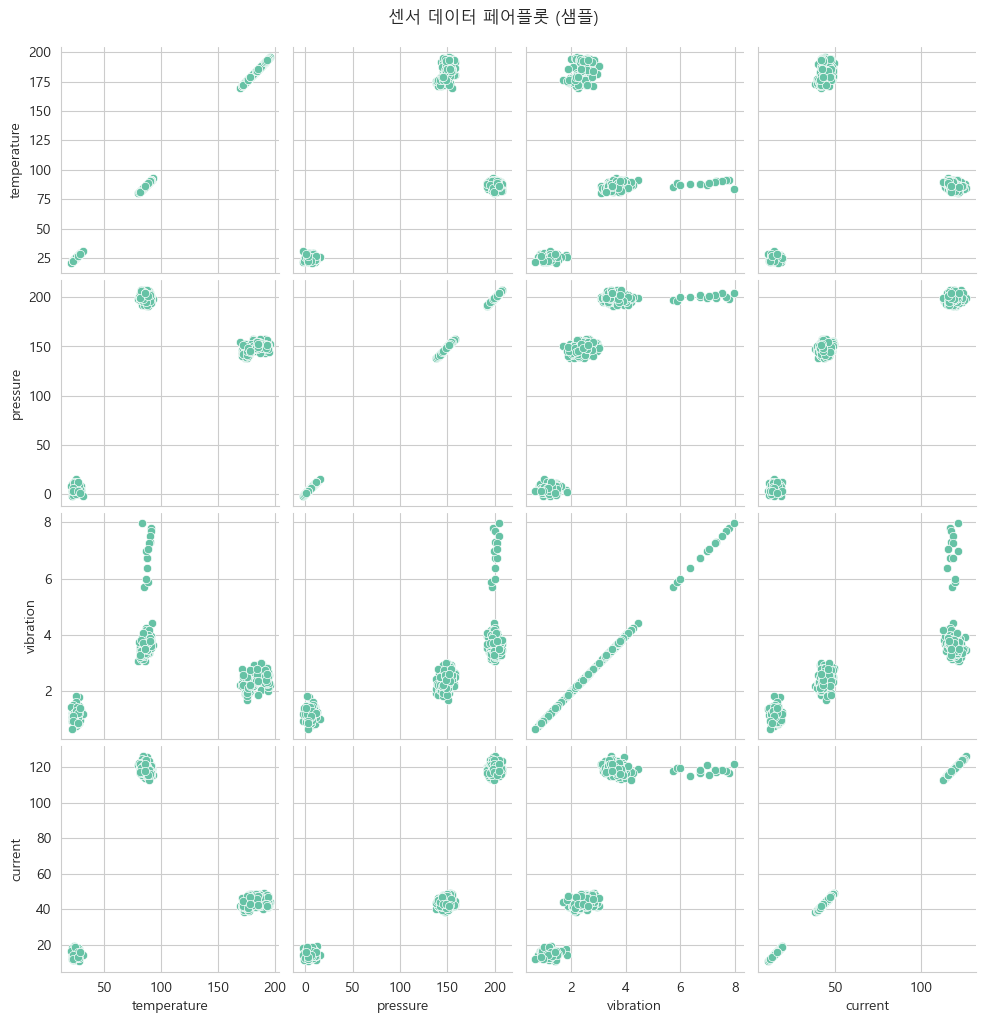

In [86]:
# 2. temperature, pressure, vibration, current 4개 변수 페어플롯
# 3. diag_kind='kde'
sns.pairplot(data=sensor_sample.loc[:, 'temperature':'current'], diag_kind=None)

# 4. 전체 제목: '센서 데이터 페어플롯 (샘플)'
#    - `plt.suptitle(..., y=1.02)`
plt.suptitle('센서 데이터 페어플롯 (샘플)', y=1.02)

plt.show()

---
## 문제 8: 복합 플롯 - 박스플롯 + 스트립플롯 (20점)

**요구사항**:
제품별 사이클 타임 분포를 박스플롯과 스트립플롯으로 동시 표시

1. 먼저 박스플롯 그리기:
   - x='product_code', y='cycle_time'
   - palette='Set2', width=0.5

2. 그 위에 스트립플롯 오버레이:
   - x='product_code', y='cycle_time'
   - color='black', alpha=0.2, size=2

3. 제목: '제품별 사이클 타임 분포 (박스플롯 + 데이터 포인트)'
4. Figure 크기: (10, 6)

**힌트**: 같은 axes에 두 개의 플롯을 순차적으로 그리기

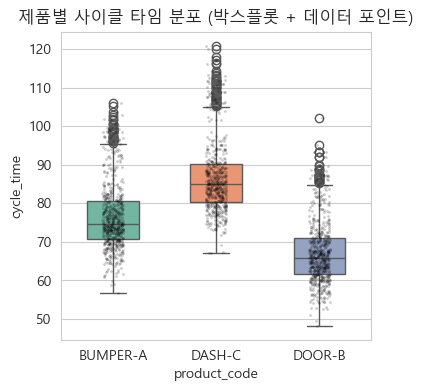

In [85]:
# 4. Figure 크기: (10, 6)
# plt.figure(figsize=(10, 6))
plt.figure(figsize=(4, 4))

# 1. 먼저 박스플롯 그리기:
#    - x='product_code', y='cycle_time'
#    - palette='Set2', width=0.5
sns.boxplot(data=production_df, x='product_code', y='cycle_time', hue='product_code',
            palette='Set2', width=0.5)

# 2. 그 위에 스트립플롯 오버레이:
#    - x='product_code', y='cycle_time'
#    - color='black', alpha=0.2, size=2
sns.stripplot(data=production_df, x='product_code', y='cycle_time',
              color='black', alpha=0.2, size=2)

# 3. 제목: '제품별 사이클 타임 분포 (박스플롯 + 데이터 포인트)'
plt.title('제품별 사이클 타임 분포 (박스플롯 + 데이터 포인트)')

plt.show()

---
## 수고하셨습니다!

### 학습 체크리스트
- [ ] 박스플롯으로 분포 비교
- [ ] 바이올린 플롯으로 밀도 표시
- [ ] 히트맵으로 상관관계 분석
- [ ] 히트맵으로 피벗 테이블 시각화
- [ ] 카운트 플롯으로 빈도 분석
- [ ] 바 플롯으로 평균과 오차 표시
- [ ] 페어플롯으로 변수 간 관계 파악
- [ ] 복합 플롯으로 다층 정보 표시
